In [368]:
import pandas as pd
pd.options.mode.chained_assignment = None 

In [369]:
## TASK 1 ###

#read in csv with nulls removed 
df = pd.read_csv("imputed.csv", index_col=0)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52037 entries, 0 to 54230
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          52037 non-null  int64  
 1   member_id                   52037 non-null  int64  
 2   loan_amount                 52037 non-null  int64  
 3   funded_amount               52037 non-null  float64
 4   funded_amount_inv           52037 non-null  float64
 5   term                        52037 non-null  object 
 6   int_rate                    52037 non-null  float64
 7   instalment                  52037 non-null  float64
 8   grade                       52037 non-null  object 
 9   sub_grade                   52037 non-null  object 
 10  employment_length           52037 non-null  object 
 11  home_ownership              52037 non-null  object 
 12  annual_inc                  52037 non-null  float64
 13  verification_status         520

In [371]:
df["term"] = df["term"].str.replace("months", "")
df["term"] = pd.to_numeric(df["term"], errors='coerce')

In [372]:
## what has been recovered vs what is left to be recovered 

In [373]:
count_fully_paid = len(df[df['loan_status'].str.contains('Fully Paid')])
print(f"Occurences of 'Fully Paid': {count_fully_paid}")

Occurences of 'Fully Paid': 27224


In [374]:
total_rows = len(df)
total_rows

52037

In [375]:
percentage_recovered = count_fully_paid/total_rows*100
print(f"percentage of loans that have been fully recovered: {percentage_recovered}%")

percentage of loans that have been fully recovered: 52.316620865922324%


In [376]:
##total amount to be paid over the loans term = term*instalment 

In [377]:
#remove rows which have been fully paid 
df_removed_fully_paid = df[df["loan_status"].str.contains("Fully Paid") == False]
df_removed_fully_paid.to_csv("removed_fully_paid_rows.csv")


In [378]:
# **loan_amount**: amount of loan the applicant received
# amount paid so far = total_payment 
# term * instalment = total remaining to pay 
# remove months from term column 

In [379]:
#read in csv containing only members who have not fully repaid their loan 
df = pd.read_csv("removed_fully_paid_rows.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24813 entries, 0 to 24812
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  24813 non-null  int64  
 1   id                          24813 non-null  int64  
 2   member_id                   24813 non-null  int64  
 3   loan_amount                 24813 non-null  int64  
 4   funded_amount               24813 non-null  float64
 5   funded_amount_inv           24813 non-null  float64
 6   term                        24813 non-null  int64  
 7   int_rate                    24813 non-null  float64
 8   instalment                  24813 non-null  float64
 9   grade                       24813 non-null  object 
 10  sub_grade                   24813 non-null  object 
 11  employment_length           24813 non-null  object 
 12  home_ownership              24813 non-null  object 
 13  annual_inc                  248

In [380]:
#convert term column to numeric data type 
df["term"] = pd.to_numeric(df["term"], errors='coerce')

print(df["term"].dtype)
df["term"]

int64


0        36
1        36
2        36
3        36
4        36
         ..
24808    36
24809    36
24810    36
24811    36
24812    36
Name: term, Length: 24813, dtype: int64

In [381]:
#total_to_pay column how much is left to pay over the loans term including interest 
df["total_owed"] = df["term"] * df["instalment"]
df


,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,total_owed
0,0,38676116,41461848,8000,8000.0,8000.0,36,7.49,248.82,A,...,0.0,0.00,0.00,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL,8957.52
1,1,38656203,41440010,13200,13200.0,13200.0,36,6.99,407.52,A,...,0.0,0.00,0.00,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL,14670.72
2,4,38656121,41439927,15000,15000.0,15000.0,36,6.03,456.54,A,...,0.0,0.00,0.00,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL,16435.44
3,5,38656111,41439917,2525,2525.0,2525.0,36,11.44,83.20,B,...,0.0,0.00,0.00,2022-01-01,91.39,2022-01-01,0.0,1,INDIVIDUAL,2995.20
4,7,38656067,41439872,26500,26500.0,26200.0,36,19.99,701.95,E,...,0.0,0.00,0.00,2021-08-01,701.95,2022-01-01,0.0,1,INDIVIDUAL,25270.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24808,54190,123133,114358,11050,11050.0,1175.0,36,15.96,388.28,F,...,0.0,0.00,0.00,2014-05-01,388.27,2022-01-01,0.0,1,INDIVIDUAL,13978.08
24809,54194,113179,113093,1000,1000.0,950.0,36,10.59,32.55,C,...,0.0,21.29,0.23,2015-05-01,32.55,2015-10-01,0.0,1,INDIVIDUAL,1171.80
24810,54198,111227,111223,20000,20000.0,2800.0,36,13.43,678.08,E,...,0.0,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL,24410.88
24811,54212,94406,94385,6725,12000.0,825.0,36,13.12,226.98,D,...,0.0,0.00,0.00,2015-04-01,42.11,2022-01-01,0.0,1,INDIVIDUAL,8171.28


In [382]:
##total owed - total paid gives what is still left to pay
df["total_remaining_to_pay"] = (df["total_owed"] - df["total_payment"])
df

,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,total_owed,total_remaining_to_pay
0,0,38676116,41461848,8000,8000.0,8000.0,36,7.49,248.82,A,...,0.00,0.00,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL,8957.52,5975.01
1,1,38656203,41440010,13200,13200.0,13200.0,36,6.99,407.52,A,...,0.00,0.00,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL,14670.72,9785.61
2,4,38656121,41439927,15000,15000.0,15000.0,36,6.03,456.54,A,...,0.00,0.00,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL,16435.44,10961.98
3,5,38656111,41439917,2525,2525.0,2525.0,36,11.44,83.20,B,...,0.00,0.00,2022-01-01,91.39,2022-01-01,0.0,1,INDIVIDUAL,2995.20,2081.60
4,7,38656067,41439872,26500,26500.0,26200.0,36,19.99,701.95,E,...,0.00,0.00,2021-08-01,701.95,2022-01-01,0.0,1,INDIVIDUAL,25270.20,21087.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24808,54190,123133,114358,11050,11050.0,1175.0,36,15.96,388.28,F,...,0.00,0.00,2014-05-01,388.27,2022-01-01,0.0,1,INDIVIDUAL,13978.08,10873.30
24809,54194,113179,113093,1000,1000.0,950.0,36,10.59,32.55,C,...,21.29,0.23,2015-05-01,32.55,2015-10-01,0.0,1,INDIVIDUAL,1171.80,467.85
24810,54198,111227,111223,20000,20000.0,2800.0,36,13.43,678.08,E,...,0.00,0.00,2016-02-01,678.08,2022-01-01,0.0,1,INDIVIDUAL,24410.88,4071.22
24811,54212,94406,94385,6725,12000.0,825.0,36,13.12,226.98,D,...,0.00,0.00,2015-04-01,42.11,2022-01-01,0.0,1,INDIVIDUAL,8171.28,3960.34


In [383]:
total_remaining_to_pay = df["total_remaining_to_pay"].sum()
total_owed = df["total_owed"].sum()
percentage_remaining = total_remaining_to_pay/total_owed*100
percentage_remaining

48.512195612684586

In [384]:
#how much will be paid back in 6 months - instalment amount * 6 added to total payment column then sum 

df["total_paid_in_6_months"] = (df["instalment"]*6) + df["total_payment"]
total_paid_in_6_months = df["total_paid_in_6_months"].sum()
percentage_paid_in_6_months = total_paid_in_6_months/total_owed*100
percentage_paid_in_6_months

64.797846231992

Text(0.5, 1.0, 'Percentage of loans recovered compared to percentage remaining to be paid')

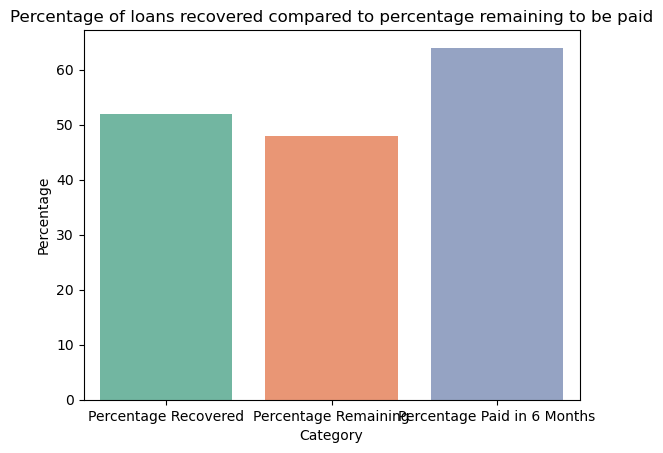

In [385]:
import seaborn as sns
results = pd.DataFrame({"Category": ["Percentage Recovered", "Percentage Remaining", "Percentage Paid in 6 Months"],
                        "Percentage": [52, 48, 64]
})
sns.barplot(data=results, x="Category", y="Percentage", palette="Set2").set_title("Percentage of loans recovered compared to percentage remaining to be paid")

In [386]:
## TASK 2 ###

In [387]:
df = pd.read_csv("imputed.csv", index_col=0)

In [388]:
df["term"] = df["term"].str.replace("months", "")
df["term"] = pd.to_numeric(df["term"], errors='coerce')

In [389]:
##percentage of charged off loans 

count_charged_off = len(df[df['loan_status'].str.contains('Charged Off')])
print(f"Occurences of 'Charged Off': {count_charged_off}")

total_rows = len(df)
print(f"total rows: {total_rows} ")

percentage_charged_off = count_charged_off/total_rows*100
print(f"percentage of loans that have been charged off: {percentage_charged_off}%")

Occurences of 'Charged Off': 5585
total rows: 52037 
percentage of loans that have been charged off: 10.732747852489574%


In [390]:
## total amount that was paid towards these loans before being charged off 

df_charged_off = df[df["loan_status"].str.contains("Charged Off")]
df_charged_off.to_csv("charged_off_df.csv")

In [391]:
amount_paid = df_charged_off["total_payment"].sum()
print(f"The total amount paid towards the Charged Off loans before they were Charged Off was: {amount_paid}")

The total amount paid towards the Charged Off loans before they were Charged Off was: 37729484.40350347


In [392]:
## TASK 3 ###

In [393]:
# calculate the loss in revenue from the loans not finishing their term 
# total to pay back back: term * instalment 
#total paid back = total_payment
# last payment date - issue date will give how many months they paid until they stopped 

In [394]:
df_charged_off["total_to_pay"] = df_charged_off["term"] * df_charged_off["instalment"]
sum_total_to_pay = df_charged_off["total_to_pay"].sum()
print(f"The total to be paid back from all the charged off loans was: {sum_total_to_pay}")
total_paid = df_charged_off["total_payment"].sum()
print(f"The total that was paid back before the accounts were Charged Off was: {total_paid}")

The total to be paid back from all the charged off loans was: 103291401.36
The total that was paid back before the accounts were Charged Off was: 37729484.40350347


In [395]:
loss_in_revenue = sum_total_to_pay - total_paid
print(f"The loss in revenue from unpaid loans is: {loss_in_revenue}")

The loss in revenue from unpaid loans is: 65561916.95649653


Text(0.5, 1.0, 'Projected loss from unpaid loans')

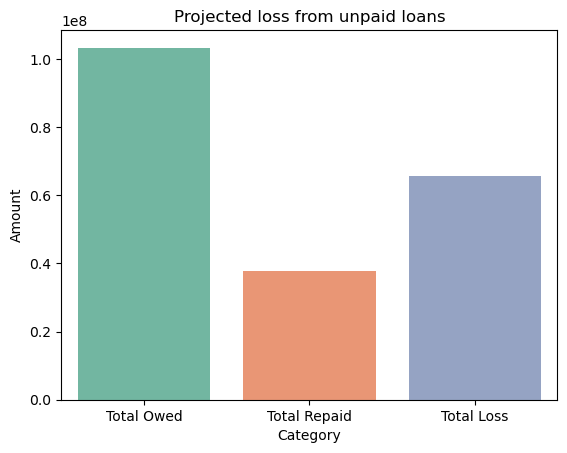

In [396]:
import seaborn as sns
results = pd.DataFrame({"Category": ["Total Owed", "Total Repaid", "Total Loss"],
                        "Amount": [103291401, 37729484, 65561916]
})
sns.barplot(data=results, x="Category", y="Amount", palette="Set2").set_title("Projected loss from unpaid loans")

In [397]:
## TASK 4 ###

In [398]:
df["loan_status"].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [399]:
customers_late_payments = len(df[df["loan_status"].str.contains("Late|In Grace Period")])
print(f"The number of customers behind with their payments is: {customers_late_payments}")
percentage_at_risk = customers_late_payments/total_rows*100
print(f"Percentage of customers behind with their payments is: {percentage_at_risk}")

The number of customers behind with their payments is: 901
Percentage of customers behind with their payments is: 1.7314603070891867


In [400]:
##add up remaining owed rows where loan status is grace period or late 
df_loss_risk = df[df["loan_status"].str.contains("Late|In Grace Period")]

In [401]:
total_paid = sum(df_loss_risk["total_payment"])
print(f"Total paid so far: {total_paid}")
total_to_pay = df_loss_risk["term"] * df_loss_risk["instalment"]
total_over_term = total_to_pay.sum()
print(f"Total to pay over whole term: {total_over_term}")
potential_loss = total_over_term-total_paid
print(f"The company would lose {potential_loss} if the status of customers behind on their payments was changed to Charged Off")

Total paid so far: 9737968.499999996
Total to pay over whole term: 19227040.560000002
The company would lose 9489072.060000006 if the status of customers behind on their payments was changed to Charged Off


In [402]:
df_2 = df[df["loan_status"].str.contains("Late|In Grace Period|Charged Off")]
df_2["total_expected_revenue"] = df_2["term"]*df_2["instalment"]
df["total_revenue"] = df["term"] * df["instalment"]
total_expected_reveune = df_2["total_expected_revenue"].sum()
total_revenue = df["total_revenue"].sum()
perfentage_charged_off = total_expected_reveune/total_revenue*100
print(f"If customers that are late on payments converted to Charged off, the percentage of total expected revenue of these customers and customers who have already defaulted on their loan would be: {percentage_charged_off}%")

If customers that are late on payments converted to Charged off, the percentage of total expected revenue of these customers and customers who have already defaulted on their loan would be: 10.732747852489574%


In [403]:
## TASK 5 ###

In [404]:
df_loss_risk.to_csv("loss_risk.csv")

In [405]:
grade_loss_risk = df_loss_risk["grade"].mode()
grade_charged_off = df_charged_off["grade"].mode()
print(f"Most common grade in charged off status is: {grade_charged_off}")
print(f"Most common grade in at risk status is: {grade_loss_risk}")


Most common grade in charged off status is: 0    C
Name: grade, dtype: object
Most common grade in at risk status is: 0    C
Name: grade, dtype: object


In [406]:
purpose_loss_risk = df_loss_risk["purpose"].mode()
purpose_charged_off = df_charged_off["purpose"].mode()
print(f"Most common purpose in charged off status is: {purpose_charged_off}")
print(f"Most common purpose in at risk status is: {purpose_loss_risk}")

Most common purpose in charged off status is: 0    debt_consolidation
Name: purpose, dtype: object
Most common purpose in at risk status is: 0    debt_consolidation
Name: purpose, dtype: object


In [407]:
home_ownership_loss_risk = df_loss_risk["home_ownership"].mode()
home_ownership_charged_off = df_charged_off["home_ownership"].mode()
print(f"Most common home ownership in charged off status is: {home_ownership_charged_off}")
print(f"Most common home ownership in at risk status is: {home_ownership_loss_risk}")

Most common home ownership in charged off status is: 0    RENT
Name: home_ownership, dtype: object
Most common home ownership in at risk status is: 0    RENT
Name: home_ownership, dtype: object


In [408]:
int_rate_loss_risk = df_loss_risk["int_rate"].mode()
int_rate_charged_off = df_charged_off["int_rate"].mode()
print(f"Most common interest rate in charged off status is: {int_rate_charged_off}")
print(f"Most common interest rate in at risk status is: {int_rate_loss_risk}")

Most common interest rate in charged off status is: 0    13.17
Name: int_rate, dtype: float64
Most common interest rate in at risk status is: 0    13.17
Name: int_rate, dtype: float64


In [409]:
int_rate_loss_risk = df_loss_risk["int_rate"].mean()
int_rate_charged_off = df_charged_off["int_rate"].mean()
print(f"Average interest rate in charged off status is: {int_rate_charged_off}")
print(f"Average interest rate in at risk status is: {int_rate_loss_risk}")

Average interest rate in charged off status is: 15.103955237242614
Average interest rate in at risk status is: 15.898435072142064
